In [26]:
import matplotlib.pyplot as plt
import os
from time import time
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

In [27]:
print("PyTorch version: ", torch.__version__)

PyTorch version:  2.6.0+cu124


In [28]:
!nvidia-smi

Sat Mar  1 18:02:58 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.05              Driver Version: 560.35.05      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4080 ...    Off |   00000000:01:00.0  On |                  N/A |
| N/A   46C    P2             21W /   60W |     841MiB /  12282MiB |     16%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [29]:
tensor_with_zeros = torch.zeros(1,2,3, device='cpu')
print(tensor_with_zeros)

tensor_with_zeros_on_gpu = torch.zeros(1,2,3, device='cuda')
print(tensor_with_zeros_on_gpu)

tensor([[[0., 0., 0.],
         [0., 0., 0.]]])
tensor([[[0., 0., 0.],
         [0., 0., 0.]]], device='cuda:0')


In [30]:
tensor_with_zeros_cpu_to_gpu = tensor_with_zeros.to('cuda')
print(tensor_with_zeros_cpu_to_gpu)

tensor([[[0., 0., 0.],
         [0., 0., 0.]]], device='cuda:0')


In [31]:
python_list = [1,2,3]
tensor_from_list = torch.tensor(python_list)
tensor_from_array = torch.tensor(np.array(python_list)) # tensor() copies the data
tensor_from_array_again = torch.from_numpy(np.array(python_list)) # from_numpy() does not copy the data

print(tensor_from_list, tensor_from_array, tensor_from_array_again)

tensor([1, 2, 3]) tensor([1, 2, 3]) tensor([1, 2, 3])


Whats the difference between torch.tensor(np.array(python_list)) and torch.from_numpy(np.array(python_list)) 

In [32]:
python_list = [1,2,3]
np_array = np.array(python_list)
tensor_v1 = torch.tensor(np_array)
tensor_v2 = torch.from_numpy(np_array)
np_array[0] = 1000

print("np_array: ", np_array)
print("tensor_v1: ", tensor_v1)
print("tensor_v2: ", tensor_v2)

# from_numpy() does not copy the data whereas tensor() does
# this is beneficial when working with large tensors, similar to passing by reference

np_array:  [1000    2    3]
tensor_v1:  tensor([1, 2, 3])
tensor_v2:  tensor([1000,    2,    3])


Lets start with logistic regression

tensor([[ 0.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.]]) tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])


Text(0, 0.5, 'Y')

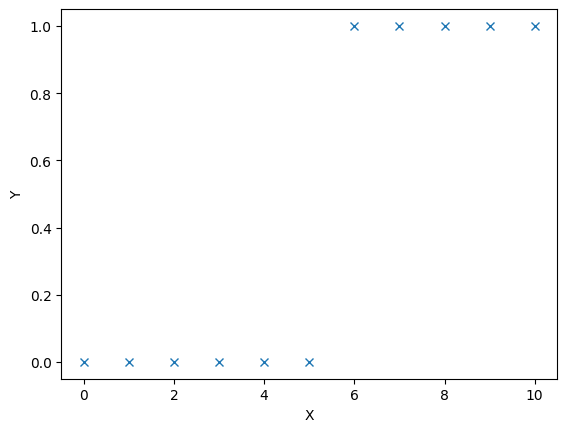

In [33]:
num_max = 11
X = torch.arange(0, num_max).unsqueeze(1).float()
Y = (X > num_max//2).float() # 0 if X < num_max//2, 1 if X >= num_max//2
print(X, Y)

plt.plot(X, Y, "x")
plt.xlabel("X")
plt.ylabel("Y")

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]])
tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]])
tensor(0.5455)


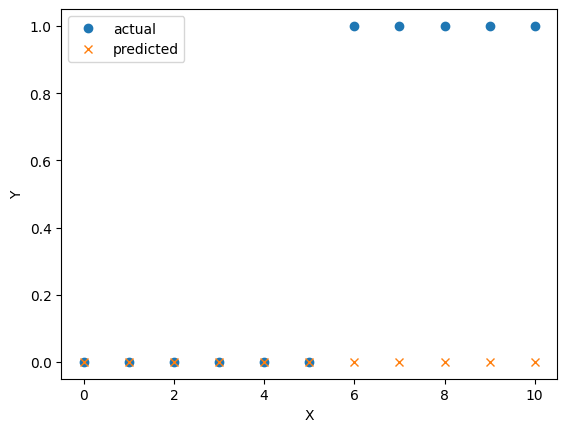

In [34]:
W = torch.zeros(1,1)
b = torch.zeros(1)

logits = (X * W.t() + b) # t() is the transpose operator
predications = torch.sigmoid(logits)
print(predications)

labels = (predications > 0.5).long()
print(labels)

accuracy = (labels == Y).float().mean()
print(accuracy)

# This model is trying to learn the relationship between X and Y

# Now we will plot the model's predictions vs the actual labels
plt.plot(X, Y, "o", label="actual")
plt.plot(X, labels, "x", label="predicted")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()


Now gradiant descent

In [35]:
dW = torch.zeros_like(W)
db = torch.zeros_like(b)

Define the Binary Cross Entry (BCE) loss function

In [36]:
def loss_function(predications, Y):
    return -(Y*predications.log() + (1-Y)*(1-predications).log()).mean()

In [37]:
print(loss_function(predications, Y))

tensor(0.6931)


In [38]:
dW = (X * (predications - Y).t()).mean()
db = (predications - Y).mean()
print(dW, db)

tensor(0.2273) tensor(0.0455)


In [39]:
lr = 0.001
print(W, b)
W = W - lr * dW
b = b - lr * db
print(W, b)

tensor([[0.]]) tensor([0.])
tensor([[-0.0002]]) tensor([-4.5455e-05])


In [40]:
W = torch.zeros(1,1)
b = torch.zeros(1)

predications = torch.sigmoid(W.t() * X + b)
print(predications)

labels = (predications > 0.5).float()
print(labels)

accuracy = (labels == Y).float().mean()
print(accuracy)

dW = torch.zeros_like(W)
db = torch.zeros_like(b)

dW = (X * (predications - Y).t()).mean()
db = (predications - Y).mean()
print(dW, db)

lr = 0.001
print(W, b)
W = W - lr * dW
b = b - lr * db
print(W, b)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]])
tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]])
tensor(0.5455)
tensor(0.2273) tensor(0.0455)
tensor([[0.]]) tensor([0.])
tensor([[-0.0002]]) tensor([-4.5455e-05])


In [41]:
def init_params():
    W = torch.zeros(1,1)
    b = torch.zeros(1)
    return W, b

def compute_predictions(W, X, b):
    logits = (W.t() * X + b)
    predications = torch.sigmoid(logits)
    return predications

def get_labels(predications):
    return (predications > 0.5).float()